In [10]:
! pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


You should consider upgrading via the 'c:\users\vishal thakur\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import joblib

plt.style.use("fivethirtyeight")

In [12]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4 # small random number
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"Initial weights before training: \n{self.weights}")
        self.eta = eta
        self.epochs = epochs
    
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias : \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted values after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
            
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss
    
    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
            
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
            
    def load(self, filepath):
        return joblib.load(filepath)
    

In [13]:
def prepare_data(df, target_col="y"):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    return X, y

In [14]:
AND = {
    "x1": [0, 0, 1, 1],
    "x2": [0, 1, 0, 1],
    "y": [0, 0, 0, 1]
}

df_AND = pd.DataFrame(AND)

df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [15]:
X, y = prepare_data(df_AND)
print(X)
print("*"*5)
print(y)

   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
*****
0    0
1    0
2    0
3    1
Name: y, dtype: int64


In [16]:
ETA = 0.1
EPOCHS = 10

model_and = Perceptron(eta = ETA, epochs = EPOCHS)
model_and.fit(X, y)

model_and.total_loss()

Initial weights before training: 
[-1.41289461e-04 -7.64802518e-06 -7.13588638e-05]
X with bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted values after forward pass: 
[1 1 0 0]
error: 
0   -1
1   -1
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 9.98587105e-02 -7.64802518e-06  9.99286411e-02]
####################
--------------------
for epoch >> 1
--------------------
predicted values after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 1.99858711e-01  9.99923520e-02 -7.13588638e-05]
####################
--------------------
for epoch >> 2
--------------------
predicted values after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 9.98587105e-02 -7.64802518e-06  2.99928641e-01]
####################
--------------------
for epoch

0

In [17]:
XOR = {
    "x1": [0, 0, 1, 1],
    "x2": [0, 1, 0, 1],
    "y": [0, 1, 1, 0]
}

df_XOR = pd.DataFrame(XOR)

df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [18]:
X, y = prepare_data(df_XOR)
print(X)
print("*"*5)
print(y)

   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
*****
0    0
1    1
2    1
3    0
Name: y, dtype: int64


In [19]:
ETA = 0.1
EPOCHS = 10

model_xor = Perceptron(eta = ETA, epochs = EPOCHS)
model_xor.fit(X, y)

model_xor.total_loss()

Initial weights before training: 
[ 7.45303715e-05 -9.74702939e-06  2.19003675e-04]
X with bias : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted values after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.10007453  0.09999025 -0.199781  ]
####################
--------------------
for epoch >> 1
--------------------
predicted values after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 7.45303715e-05 -9.74702939e-06  2.19003675e-04]
####################
--------------------
for epoch >> 2
--------------------
predicted values after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.10007453  0.09999025 -0.199781  ]
####################
--------------------
for epoch >> 3
------------------

-2

### The reason its not working on xor data is because its non linear and we know perceptron doesn't work on non linear data

### AND GATE

<AxesSubplot:xlabel='x1', ylabel='x2'>

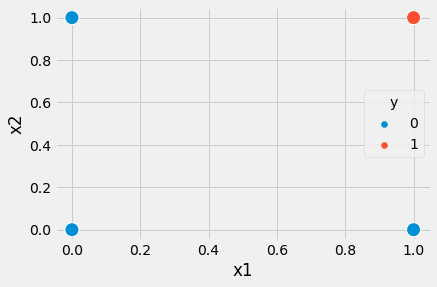

In [20]:
sns.scatterplot(x = df_AND.x1, y=df_AND.x2, hue = df_AND.y, s=200)

### XOR GATE

<AxesSubplot:xlabel='x1', ylabel='x2'>

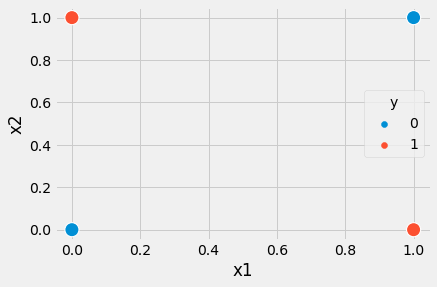

In [21]:
sns.scatterplot(x = df_XOR.x1, y=df_XOR.x2, hue = df_XOR.y, s=200)

In [23]:
model_and.save(filename="and.model")

In [24]:
reload_model_and = Perceptron().load(filepath="model/and.model")

In [25]:
reload_model_and.predict(X = [[1, 0]])

array([0])

In [26]:
reload_model_and.predict(X = [[1, 1], [0, 0], [1, 0]])

array([1, 0, 0])

In [29]:
reload_model_and.predict(X = [[0.5, 0.7], [0, 0.4], [-0.4, -0.5], [6,7]])

array([0, 0, 0, 1])

In [39]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=200, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
        
    
    def _plot_decision_regions(X, y, classifier, resolution = 0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values  # as an array
        x1 = X[:, 0]
        x2 = X[:, 1]
        
        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))
        
        
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        plt.plot()
    
    X, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(X, y, model)
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

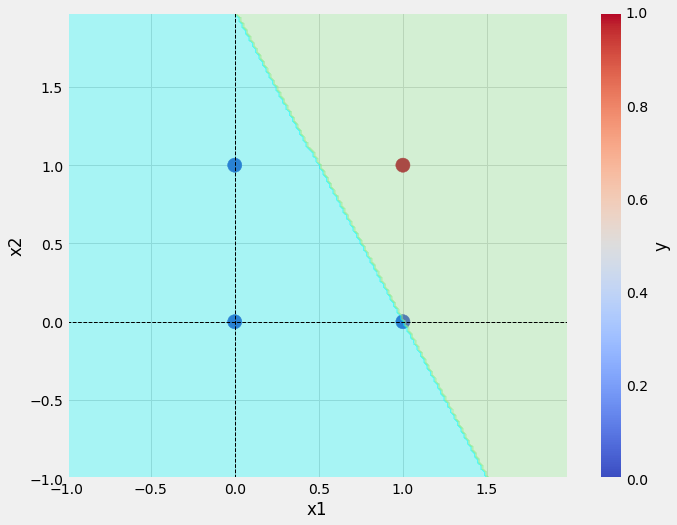

In [40]:
save_plot(df_AND, model_and, filename="and.png")

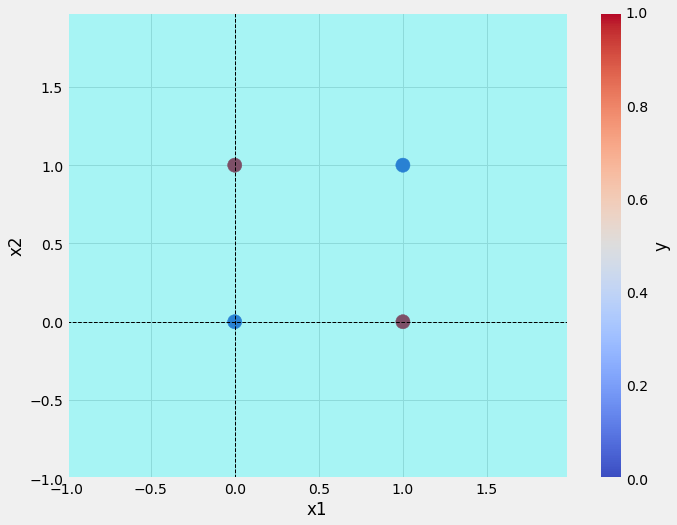

In [42]:
save_plot(df_XOR, model_xor, filename="xor.png")